In [5]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
import numpy as np 
from numpy import genfromtxt




In [7]:

f = "/home/kepler42/EE494/EE494/merged.csv"
df = pd.read_csv(f,sep=',')
print(df)

      Unnamed: 0      0    1   2   3   4
0              0    0.0  500 -41 -45 -55
1              1    0.0  500 -41 -45 -57
2              2    0.0  500 -41 -43 -55
3              3    0.0  500 -45 -43 -57
4              4    0.0  500 -45 -43 -55
...          ...    ...  ...  ..  ..  ..
5745        5745  327.0  731 -41 -47 -45
5746        5746  327.0  731 -41 -47 -45
5747        5747  327.0  731 -41 -45 -45
5748        5748  327.0  731 -39 -45 -47
5749        5749  327.0  731 -41 -47 -45

[5750 rows x 6 columns]


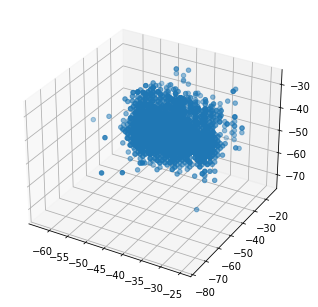

In [9]:

fig = pyplot.figure()
ax = Axes3D(fig)
# x_y = np.asarray(df['1'] )
sequence_containing_x_vals = np.asarray(df['2'] )
sequence_containing_y_vals = np.asarray(df['3'] )
sequence_containing_z_vals = np.asarray(df['4'] )

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()